In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Prototype

In [144]:
alpha = 1.0
beta = 2.0
N = 5

# Main diagonal

H = np.identity(2*N) * alpha

# Upper and lower diagonal

for i in range(2*N):
    for j in range(2*N):
        if j == i+1 or j == i-1:
            H[i,j] = beta
            
# Antidiagonal    
for i in range(0, N, 2):
    H[i, 2*N-1-i] = beta
    if i+1 < N: 
        H[i+1, 2*N-2-i] = -k
        
for i in range(2*N-1, N-1, -2):
    H[i, 2*N-1-i] = beta
    if i-1 >= N: 
        H[i-1, 2*N-i] = +k

H

array([[ 1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 2.,  1.,  2.,  0.,  0.,  0.,  0.,  0., -3.,  0.],
       [ 0.,  2.,  1.,  2.,  0.,  0.,  0.,  2.,  0.,  0.],
       [ 0.,  0.,  2.,  1.,  2.,  0., -3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  1.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  1.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  2.,  1.,  2.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.,  0.,  2.,  1.,  2.,  0.],
       [ 0.,  3.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  2.],
       [ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.]])

# Finished

In [145]:
def make_hamiltonian(k, N, alpha=1.0, beta=-2.0, a=1.0):

    H = np.identity(2*N, dtype=complex) * alpha

    # Upper and lower diagonal

    for i in range(2*N):
        for j in range(2*N):
            if j == i+1 or j == i-1:
                H[i,j] = beta

    # Antidiagonal    
    for i in range(0, N, 2):
        H[i, 2*N-1-i] = beta
        if i+1 < N: 
            H[i+1, 2*N-2-i] = beta*np.exp(-1j*k*a)

    for i in range(2*N-1, N-1, -2):
        H[i, 2*N-1-i] = beta
        if i-1 >= N: 
            H[i-1, 2*N-i] = beta*np.exp(1j*k*a)
    
    return H

In [152]:
alpha = 0.0
beta = -2.8
a = 1.0

N = 11

num_k = 51
k_array = np.linspace(-np.pi/a, np.pi/a, num_k)
E_array = np.zeros((num_k, 2*N))

for k_index, k in enumerate(k_array):
    H = make_hamiltonian(k, N, alpha, beta, a)
    E_array[k_index] = np.linalg.eigvalsh(H)
    

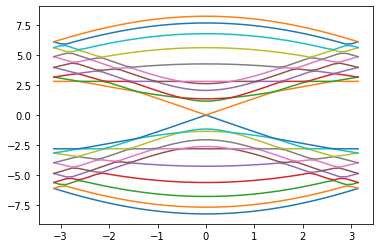

In [153]:
plt.plot(k_array, E_array)
plt.show()

# NZZNT

In [168]:
alpha = 1.0
beta = 2.0
N = 2

k=3

# Main diagonal

H = np.identity(4*N) * alpha

# Upper and lower diagonal

for i in range(4*N):
    for j in range(4*N):
        if j == i+1 or j == i-1:
            H[i,j] = beta
            
# Antidiagonal    
for i in range(0, 2*N, 2):
    H[i, 4*N-1-i] = beta
    if i+1 < 2*N: 
        H[i+1, 4*N-2-i] = -k
        
for i in range(4*N-1, 2*N-1, -2):
    H[i, 4*N-1-i] = beta
    if i-1 >= 2*N: 
        H[i-1, 4*N-i] = +k

# NZZNT

H[0, 2*N-1] = H[2*N-1, 0] = beta
H[2*N, 4*N-1] = H[4*N-1, 2*N] = beta

H

array([[ 1.,  2.,  0.,  2.,  0.,  0.,  0.,  2.],
       [ 2.,  1.,  2.,  0.,  0.,  0., -3.,  0.],
       [ 0.,  2.,  1.,  2.,  0.,  2.,  0.,  0.],
       [ 2.,  0.,  2.,  1., -3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3.,  1.,  2.,  0.,  2.],
       [ 0.,  0.,  2.,  0.,  2.,  1.,  2.,  0.],
       [ 0.,  3.,  0.,  0.,  0.,  2.,  1.,  2.],
       [ 2.,  0.,  0.,  0.,  2.,  0.,  2.,  1.]])

In [171]:
def make_NZZNT_hamiltonian(k, N, alpha=1.0, beta=-2.0, a=1.0):

    H = np.identity(4*N, dtype=complex) * alpha

    # Upper and lower diagonal

    for i in range(4*N):
        for j in range(4*N):
            if j == i+1 or j == i-1:
                H[i,j] = beta

    # Antidiagonal    
    for i in range(0, 2*N, 2):
        H[i, 4*N-1-i] = beta
        if i+1 < 2*N: 
            H[i+1, 4*N-2-i] = beta*np.exp(-1j*k*a)

    for i in range(4*N-1, 2*N-1, -2):
        H[i, 4*N-1-i] = beta
        if i-1 >= 2*N: 
            H[i-1, 4*N-i] = beta*np.exp(1j*k*a)

    # NZZNT

    H[0, 2*N-1] = H[2*N-1, 0] = beta
    H[2*N, 4*N-1] = H[4*N-1, 2*N] = beta
    
    return H

In [177]:
alpha = 0.0
beta = -2.8
a = 1.0

N = 11

num_k = 51
k_array = np.linspace(-np.pi/a, np.pi/a, num_k)
E_array = np.zeros((num_k, 4*N))

for k_index, k in enumerate(k_array):
    H = make_NZZNT_hamiltonian(k, N, alpha, beta, a)
    E_array[k_index] = np.linalg.eigvalsh(H)

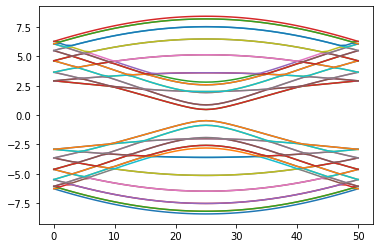

In [178]:
plt.plot(E_array)
plt.show()